$\textbf{Example 4.3: Gambler's Problem}$

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of \$100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler's capital, $s \in \{1, 2, \ldots, 99\}$ and the actions are stakes, $a \in \{0, 1, \ldots, \min(s, 100 - s)\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is $+1$. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let $p_h$ denote the probability of the coin coming up heads. If $p_h$ is known, then the entire problem is known and it can be solved, for instance, by value iteration. Figure 4.3 shows the change in the value function over successive sweeps of value iteration, and the final policy found, for the case of $p_h = 0.4$. This policy is optimal, but not unique. In fact, there is a whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function. Can you guess what the entire family looks like?

![Gambler's Problem Graphs](image/gamblers_problem_graphs.png)

$\textbf{4.8: Reasoning About Optimal Policy}$

$\underline{\text{Question:}}$ 

Why does the optimal policy for the gambler's problem have such a curious form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does not. Why is this a good policy?

$\underline{\text{Answer:}}$ 

At $50$, the optimal policy stakes $50$ because we reach the goal with probability $p_h = 0.4$. At $s = 51$, taking $a = 50$ risks going to the less optimal state $s = 1$, whereas you can go to $s = 50$ with much higher probability.

Overall, this policy instructs the agent to take aggressive actions at $\{25, 50, 75\}$ to reach \$100 in the least amount of steps, since the coin isn't fair. 

$\textbf{4.8: Value Iteration for Gambler's Problem}$

$\underline{\text{Question:}}$ 


Implement value iteration for the gambler's problem and solve it for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \to 0$?
$\underline{\text{Answer:}}$ 


In [60]:
%pip install numpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np

actions = np.arange(0, 101)

def init_state_value_func(): 
    init_state_values = np.zeros(101)
    init_state_values[100] = 1
    return init_state_values

def init_policy():
    return np.zeros((101, 101))

In [ ]:
def run_value_iteration(p_h, theta):
    error = float('inf')
    v = init_state_value_func()
    policy = init_policy()
    iterations = 0

    while error > theta:
        v_new = v.copy()
        for state in range(1, len(v) - 1):
            best_action_for_state = 0
            best_action_value = float('-inf')

            for action in range(1, min(state, 100 - state) + 1):
                if state + action == 100:
                    heads_value = 1
                else:
                    heads_value = 0 + v[state + action]
                
                tails_value = 0 + v[state - action]
                
                curr_action_value = p_h * heads_value + (1 - p_h) * tails_value

                if curr_action_value > best_action_value + 1e-10: # add a small epsilon to avoid floating point errors
                    best_action_for_state = action
                    best_action_value = curr_action_value
            
            v_new[state] = best_action_value
            policy[state, :] = 0
            policy[state, best_action_for_state] = 1
            
        error = np.max(np.abs(v_new - v))
        v = v_new
        iterations += 1
    
    return v, policy


In [122]:
run_value_iteration(p_h=0.4, theta=1e-10)

(array([0.        , 0.00206562, 0.00516406, 0.00922547, 0.01291015,
        0.0173854 , 0.02306368, 0.02781411, 0.03227539, 0.03768507,
        0.0434635 , 0.05035447, 0.05765919, 0.06523937, 0.06953528,
        0.07443124, 0.08068847, 0.08661104, 0.09421268, 0.10314362,
        0.10865874, 0.11596663, 0.12588617, 0.13357998, 0.14414799,
        0.16      , 0.16309844, 0.16774609, 0.17383821, 0.17936523,
        0.1860781 , 0.19459552, 0.20172117, 0.20841308, 0.21652761,
        0.22519525, 0.2355317 , 0.24648879, 0.25785906, 0.26430292,
        0.27164686, 0.2810327 , 0.28991657, 0.30131902, 0.31471544,
        0.32298812, 0.33394994, 0.34882926, 0.36036996, 0.37622198,
        0.4       , 0.40309844, 0.40774609, 0.41383821, 0.41936523,
        0.4260781 , 0.43459552, 0.44172117, 0.44841308, 0.45652761,
        0.46519525, 0.4755317 , 0.48648879, 0.49785906, 0.50430292,
        0.51164686, 0.5210327 , 0.52991657, 0.54131902, 0.55471544,
        0.56298812, 0.57394994, 0.58882926, 0.60

$\textbf{Value Iteration for } p_h = 0.4$

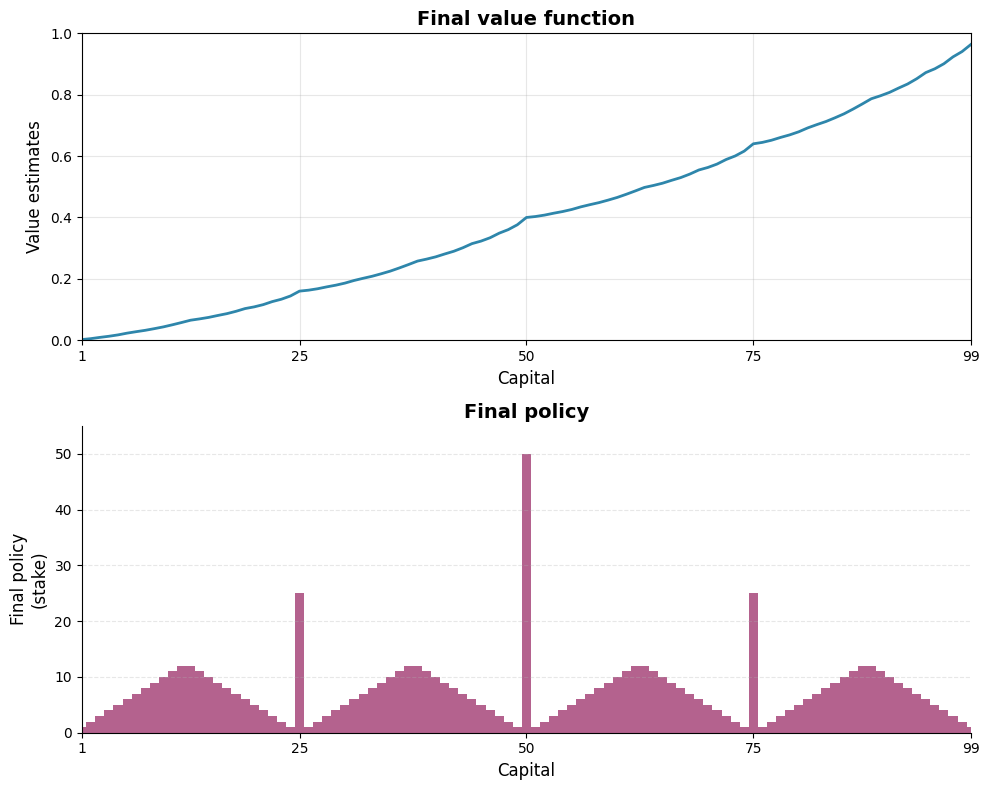

In [125]:
import matplotlib.pyplot as plt
import numpy as np

v, policy = run_value_iteration(p_h=0.4, theta=1e-10)

stakes = np.argmax(policy, axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Value function
ax1.plot(range(1, 100), v[1:100], linewidth=2, color='#2E86AB')
ax1.set_xlabel('Capital', fontsize=12)
ax1.set_ylabel('Value estimates', fontsize=12)
ax1.set_title('Final value function', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, 99])
ax1.set_ylim([0, 1])
ax1.set_xticks([1, 25, 50, 75, 99])

# Policy 
ax2.bar(range(1, 100), stakes[1:100], width=1.0, color='#A23B72', 
        edgecolor='none', alpha=0.8)
ax2.set_xlabel('Capital', fontsize=12)
ax2.set_ylabel('Final policy\n(stake)', fontsize=12)
ax2.set_title('Final policy', fontsize=14, fontweight='bold')
ax2.set_xlim([1, 99])
ax2.set_ylim([0, 55])
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_xticks([1, 25, 50, 75, 99])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

$\textbf{Value Iteration for } p_h = 0.25$

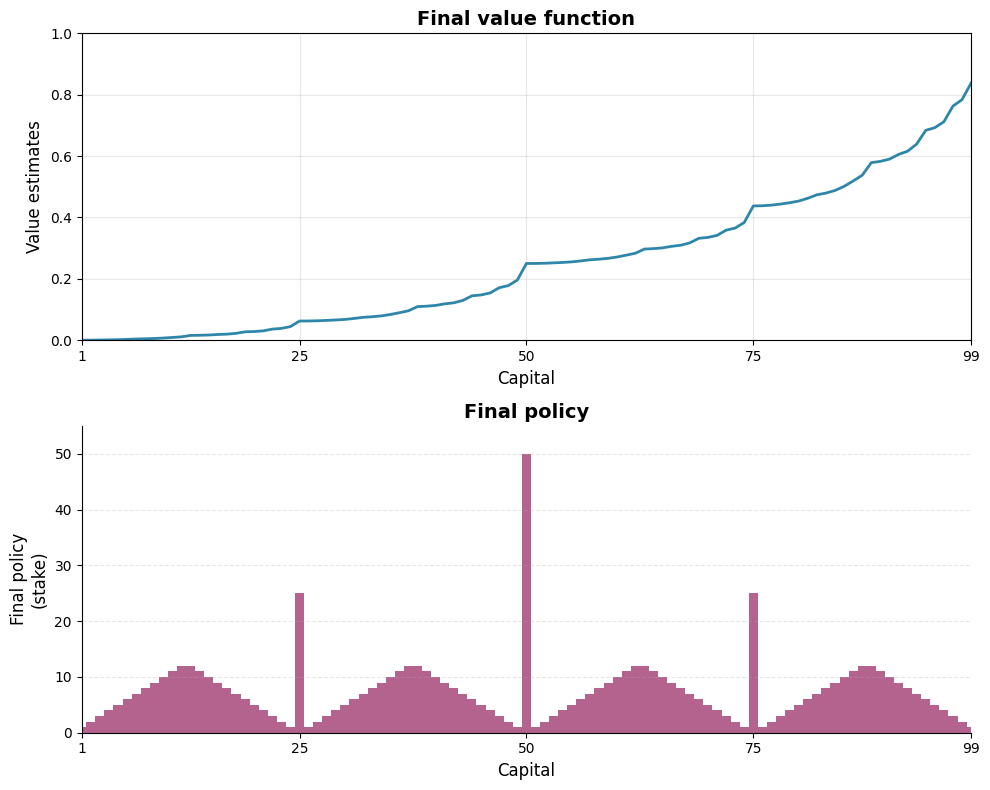

In [130]:
import matplotlib.pyplot as plt
import numpy as np

v, policy = run_value_iteration(p_h=0.25, theta=1e-10)

stakes = np.argmax(policy, axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Value function
ax1.plot(range(1, 100), v[1:100], linewidth=2, color='#2E86AB')
ax1.set_xlabel('Capital', fontsize=12)
ax1.set_ylabel('Value estimates', fontsize=12)
ax1.set_title('Final value function', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, 99])
ax1.set_ylim([0, 1])
ax1.set_xticks([1, 25, 50, 75, 99])

# Policy 
ax2.bar(range(1, 100), stakes[1:100], width=1.0, color='#A23B72', 
        edgecolor='none', alpha=0.8)
ax2.set_xlabel('Capital', fontsize=12)
ax2.set_ylabel('Final policy\n(stake)', fontsize=12)
ax2.set_title('Final policy', fontsize=14, fontweight='bold')
ax2.set_xlim([1, 99])
ax2.set_ylim([0, 55])
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_xticks([1, 25, 50, 75, 99])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

$\textbf{Value Iteration for } p_h = 0.55$

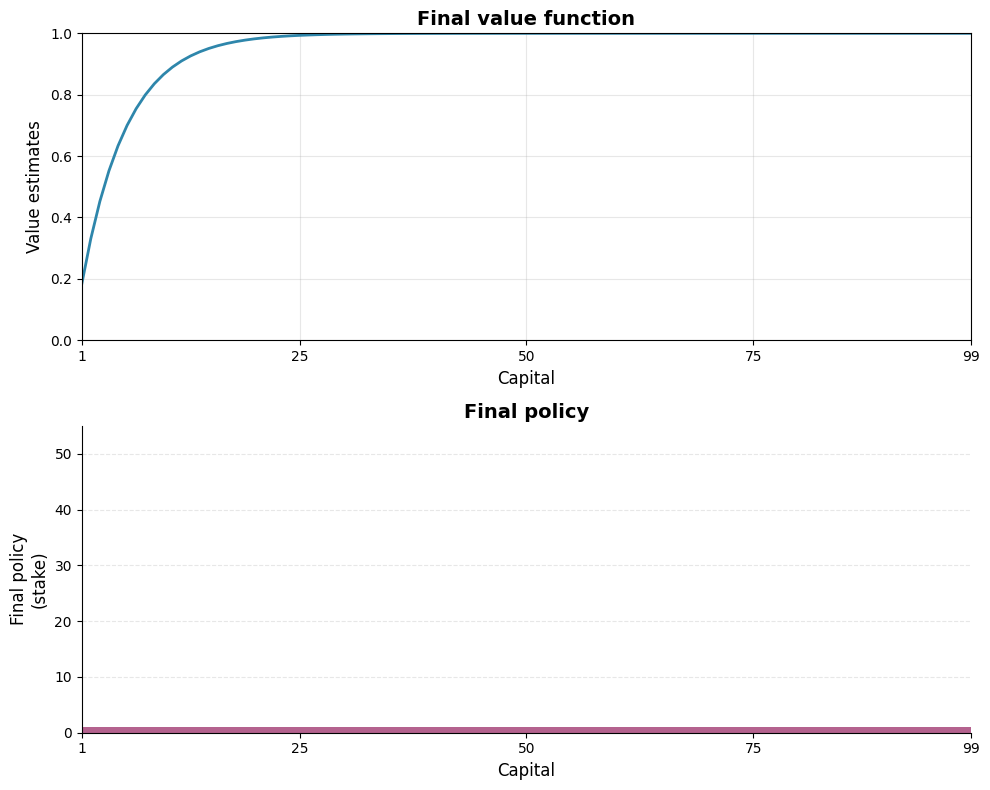

In [133]:
import matplotlib.pyplot as plt
import numpy as np

v, policy = run_value_iteration(p_h=0.55, theta=1e-10)

stakes = np.argmax(policy, axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Value function
ax1.plot(range(1, 100), v[1:100], linewidth=2, color='#2E86AB')
ax1.set_xlabel('Capital', fontsize=12)
ax1.set_ylabel('Value estimates', fontsize=12)
ax1.set_title('Final value function', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, 99])
ax1.set_ylim([0, 1])
ax1.set_xticks([1, 25, 50, 75, 99])

# Policy 
ax2.bar(range(1, 100), stakes[1:100], width=1.0, color='#A23B72', 
        edgecolor='none', alpha=0.8)
ax2.set_xlabel('Capital', fontsize=12)
ax2.set_ylabel('Final policy\n(stake)', fontsize=12)
ax2.set_title('Final policy', fontsize=14, fontweight='bold')
ax2.set_xlim([1, 99])
ax2.set_ylim([0, 55])
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_xticks([1, 25, 50, 75, 99])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()